In [1]:
import pandas as pd
% matplotlib inline

In [2]:
#Read in both parts of the Titanic dataset
my_df_1 = pd.read_csv("/Users/rharihar/Desktop/SCUBA/GA_Class/Titanic.csv")
my_df_2 = pd.read_csv("/Users/rharihar/Desktop/SCUBA/GA_Class/Titanic_II.csv")

# Merge the two dataframes into the same dataframe using append

merged_df = my_df_1.append(my_df_2)
merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Solutions

Write a function that takes as input the fare, and if it's below 10, outputs "inexpensive", 
and if it's above 10 returns "expensive". Use this function to add a new column "Fare status" to your dataframe

In [3]:
# Write the function
def fare_converter(x):
    if x < 10:
        return "inexpensive"
    else:
        return "expensive"
# Use apply to make new column

merged_df["Fare status"] = merged_df["Fare"].apply(fare_converter)
merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,inexpensive


Get all column names of your new dataframe

In [6]:
merged_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare status'],
      dtype='object')

Write this dataframe to disk as a csv file

In [7]:
merged_df.to_csv("/Users/rharihar/Desktop/SCUBA/GA_Class/sln_merged.csv", index = False)

Calculate summary statistics for the age column of your dataframe. What is the mean age ?

In [8]:
merged_df["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

What is the average age of passengers who travelled first class ?

In [9]:
class_1_df = merged_df[merged_df["Pclass"] == 1]
class_1_df["Age"].describe()

count    284.000000
mean      39.159930
std       14.548028
min        0.920000
25%       28.000000
50%       39.000000
75%       50.000000
max       80.000000
Name: Age, dtype: float64

What is the average fare paid by passengers who travelled first class ?

In [10]:
class_1_df["Fare"].describe()

count    323.000000
mean      87.508992
std       80.447178
min        0.000000
25%       30.695800
50%       60.000000
75%      107.662500
max      512.329200
Name: Fare, dtype: float64

Replace male by M and female by F in the dataframe

In [11]:
rep_df = merged_df.replace(to_replace = "female", value = "F",inplace = False)

rep_df = rep_df.replace(to_replace = "male", value = "M",inplace = False)

rep_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare status
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,expensive
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,expensive
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,inexpensive


Scatter plot fares against passenger names

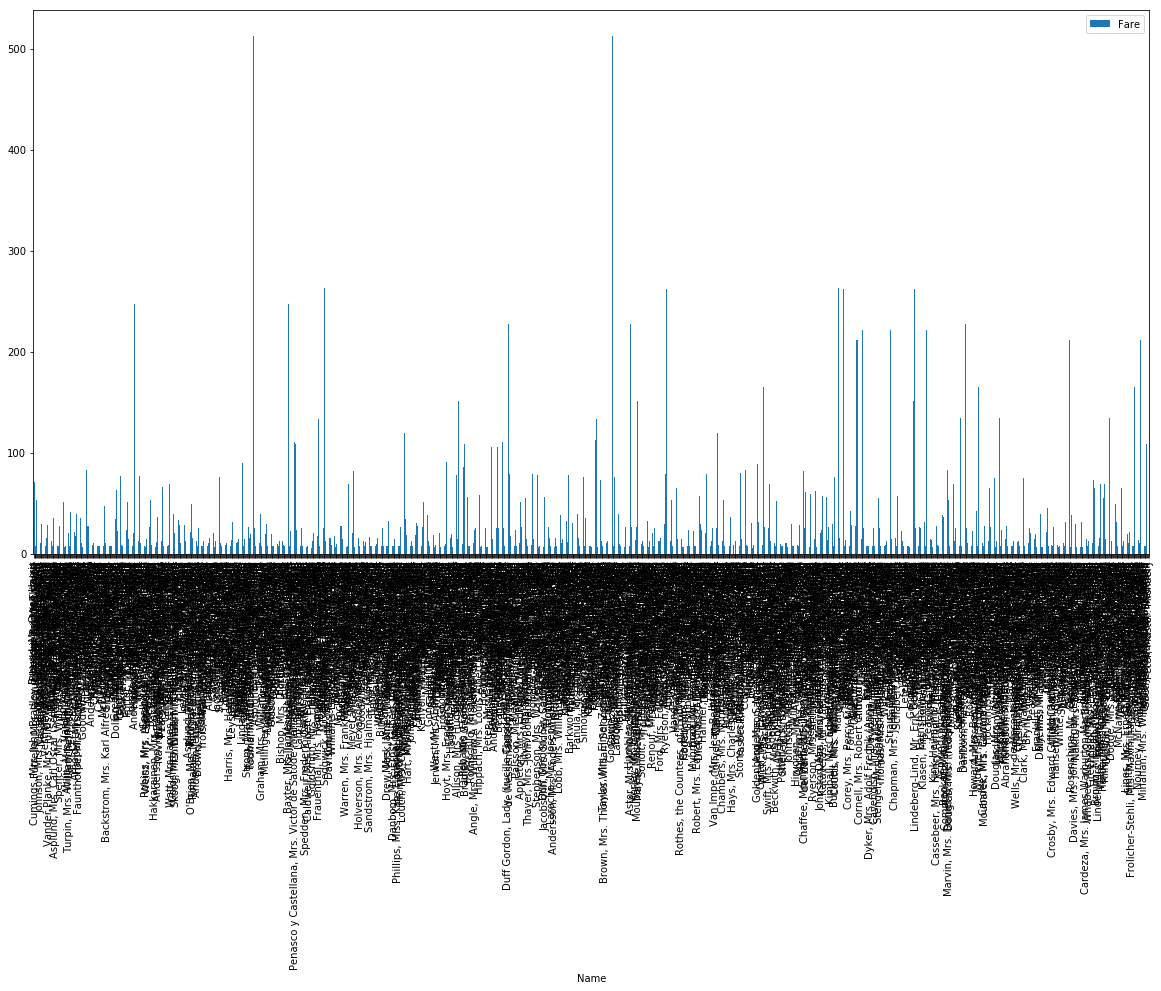

In [12]:
merged_df.plot(x = "Name", y = "Fare", kind = "bar", figsize = (20,10))